In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tf.config.gpu.set_per_process_memory_growth(True)

In [4]:
load_old = np.load
np.load = lambda *a,**k: load_old(*a,**k,allow_pickle=True)

In [5]:
NUM_WORDS = 10000
(data_trn, label_trn), (data_tst, label_tst) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

In [8]:
def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results

In [9]:
data_trn = multi_hot_sequences(data_trn, dimension=NUM_WORDS)
data_tst = multi_hot_sequences(data_tst, dimension=NUM_WORDS)

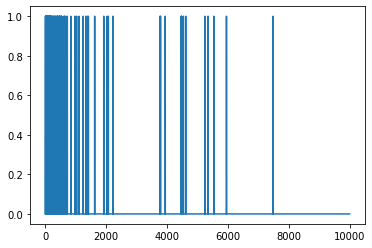

In [10]:
plt.plot(data_trn[0])

In [11]:
model_baseline = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [13]:
model_baseline.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])

In [14]:
model_baseline.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [15]:
history_baseline = model_baseline.fit(data_trn, label_trn, 
                                      epochs=20, batch_size=512, 
                                      validation_data =(data_tst, label_tst), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 5s - loss: 0.4893 - accuracy: 0.7960 - binary_crossentropy: 0.4893 - val_loss: 0.3334 - val_accuracy: 0.8759 - val_binary_crossentropy: 0.3334
Epoch 2/20
25000/25000 - 4s - loss: 0.2486 - accuracy: 0.9126 - binary_crossentropy: 0.2486 - val_loss: 0.2842 - val_accuracy: 0.8869 - val_binary_crossentropy: 0.2842
Epoch 3/20
25000/25000 - 4s - loss: 0.1826 - accuracy: 0.9353 - binary_crossentropy: 0.1826 - val_loss: 0.2914 - val_accuracy: 0.8842 - val_binary_crossentropy: 0.2914
Epoch 4/20
25000/25000 - 4s - loss: 0.1487 - accuracy: 0.9486 - binary_crossentropy: 0.1487 - val_loss: 0.3190 - val_accuracy: 0.8757 - val_binary_crossentropy: 0.3190
Epoch 5/20
25000/25000 - 4s - loss: 0.1222 - accuracy: 0.9598 - binary_crossentropy: 0.1222 - val_loss: 0.3344 - val_accuracy: 0.8745 - val_binary_crossentropy: 0.3344
Epoch 6/20
25000/25000 - 4s - loss: 0.1015 - accuracy: 0.9684 - binary_crossentropy: 0.1015 - val_loss: 0.3637

In [16]:
model_small = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model_small.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])
model_small.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [17]:
history_small = model_small.fit(data_trn, label_trn, 
                                epochs=20, batch_size=512, 
                                validation_data =(data_tst, label_tst), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.5926 - accuracy: 0.7512 - binary_crossentropy: 0.5926 - val_loss: 0.4837 - val_accuracy: 0.8445 - val_binary_crossentropy: 0.4837
Epoch 2/20
25000/25000 - 4s - loss: 0.3858 - accuracy: 0.8865 - binary_crossentropy: 0.3858 - val_loss: 0.3601 - val_accuracy: 0.8774 - val_binary_crossentropy: 0.3601
Epoch 3/20
25000/25000 - 4s - loss: 0.2844 - accuracy: 0.9096 - binary_crossentropy: 0.2844 - val_loss: 0.3126 - val_accuracy: 0.8828 - val_binary_crossentropy: 0.3126
Epoch 4/20
25000/25000 - 4s - loss: 0.2320 - accuracy: 0.9243 - binary_crossentropy: 0.2320 - val_loss: 0.2919 - val_accuracy: 0.8868 - val_binary_crossentropy: 0.2919
Epoch 5/20
25000/25000 - 4s - loss: 0.1986 - accuracy: 0.9348 - binary_crossentropy: 0.1986 - val_loss: 0.2840 - val_accuracy: 0.8881 - val_binary_crossentropy: 0.2840
Epoch 6/20
25000/25000 - 4s - loss: 0.1754 - accuracy: 0.9430 - binary_crossentropy: 0.1754 - val_loss: 0.2836

In [22]:
model_big = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model_big.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])
model_big.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [25]:
history_big = model_big.fit(data_trn, label_trn, 
                            epochs=20, batch_size=512, 
                            validation_data =(data_tst, label_tst), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 5s - loss: 0.3417 - accuracy: 0.8540 - binary_crossentropy: 0.3417 - val_loss: 0.2950 - val_accuracy: 0.8802 - val_binary_crossentropy: 0.2950
Epoch 2/20
25000/25000 - 4s - loss: 0.1409 - accuracy: 0.9495 - binary_crossentropy: 0.1409 - val_loss: 0.3336 - val_accuracy: 0.8727 - val_binary_crossentropy: 0.3336
Epoch 3/20
25000/25000 - 4s - loss: 0.0430 - accuracy: 0.9879 - binary_crossentropy: 0.0430 - val_loss: 0.4587 - val_accuracy: 0.8672 - val_binary_crossentropy: 0.4587
Epoch 4/20
25000/25000 - 4s - loss: 0.0066 - accuracy: 0.9991 - binary_crossentropy: 0.0066 - val_loss: 0.5998 - val_accuracy: 0.8685 - val_binary_crossentropy: 0.5998
Epoch 5/20
25000/25000 - 4s - loss: 8.1345e-04 - accuracy: 1.0000 - binary_crossentropy: 8.1344e-04 - val_loss: 0.6840 - val_accuracy: 0.8695 - val_binary_crossentropy: 0.6840
Epoch 6/20
25000/25000 - 4s - loss: 2.2406e-04 - accuracy: 1.0000 - binary_crossentropy: 2.2406e-04 - 

In [26]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])

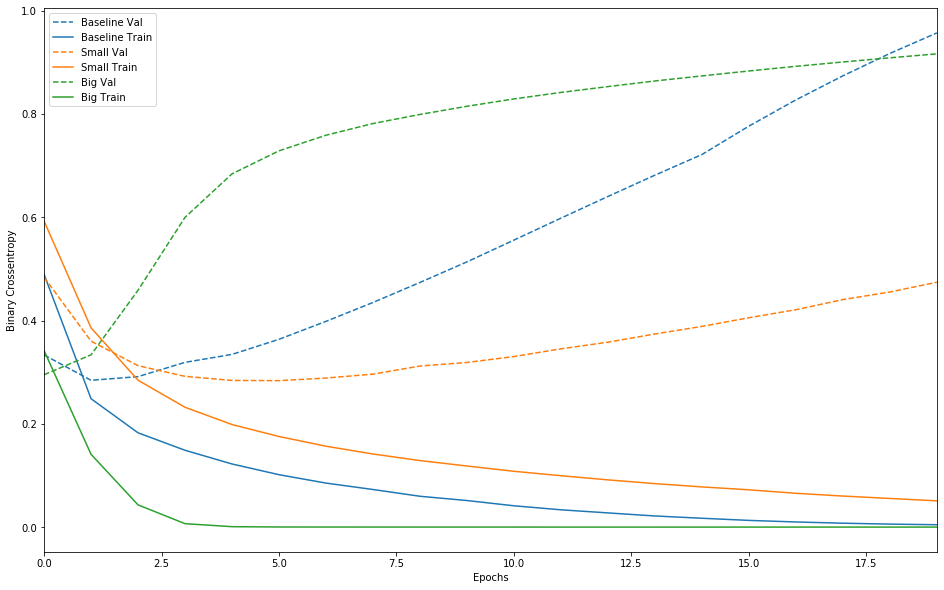

In [27]:
plot_history([('baseline', history_baseline),
              ('small', history_small),
              ('big', history_big)])

In [28]:
model_l2 = keras.Sequential([
    keras.layers.Dense(16, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(1, activation='sigmoid')
])
model_l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])
model_l2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [29]:
history_l2 = model_l2.fit(data_trn, label_trn, 
                          epochs=20, batch_size=512, 
                          validation_data =(data_tst, label_tst), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.5216 - accuracy: 0.8074 - binary_crossentropy: 0.4826 - val_loss: 0.3800 - val_accuracy: 0.8758 - val_binary_crossentropy: 0.3402
Epoch 2/20
25000/25000 - 4s - loss: 0.3043 - accuracy: 0.9073 - binary_crossentropy: 0.2601 - val_loss: 0.3340 - val_accuracy: 0.8867 - val_binary_crossentropy: 0.2866
Epoch 3/20
25000/25000 - 4s - loss: 0.2512 - accuracy: 0.9292 - binary_crossentropy: 0.2011 - val_loss: 0.3353 - val_accuracy: 0.8866 - val_binary_crossentropy: 0.2834
Epoch 4/20
25000/25000 - 4s - loss: 0.2278 - accuracy: 0.9394 - binary_crossentropy: 0.1740 - val_loss: 0.3507 - val_accuracy: 0.8810 - val_binary_crossentropy: 0.2956
Epoch 5/20
25000/25000 - 4s - loss: 0.2119 - accuracy: 0.9474 - binary_crossentropy: 0.1557 - val_loss: 0.3629 - val_accuracy: 0.8777 - val_binary_crossentropy: 0.3057
Epoch 6/20
25000/25000 - 4s - loss: 0.2000 - accuracy: 0.9528 - binary_crossentropy: 0.1417 - val_loss: 0.3754

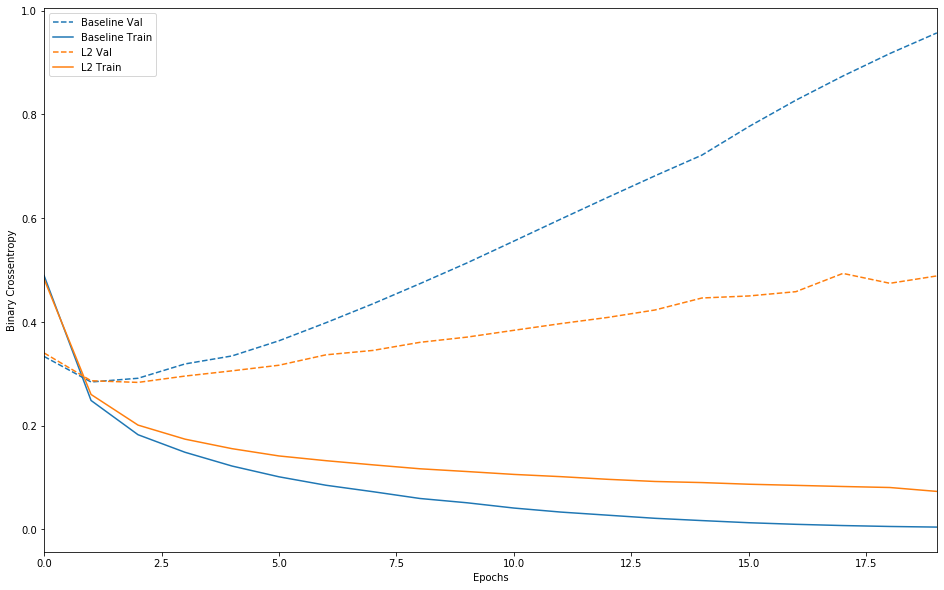

In [30]:
plot_history([('baseline', history_baseline),
              ('l2', history_l2)])

In [32]:
model_dropout = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])
model_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])
model_dropout.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 16)                160016    
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [33]:
history_dropout = model_dropout.fit(data_trn, label_trn, 
                          epochs=20, batch_size=512, 
                          validation_data =(data_tst, label_tst), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.6137 - accuracy: 0.6577 - binary_crossentropy: 0.6137 - val_loss: 0.4710 - val_accuracy: 0.8544 - val_binary_crossentropy: 0.4710
Epoch 2/20
25000/25000 - 4s - loss: 0.4453 - accuracy: 0.8235 - binary_crossentropy: 0.4453 - val_loss: 0.3449 - val_accuracy: 0.8805 - val_binary_crossentropy: 0.3449
Epoch 3/20
25000/25000 - 4s - loss: 0.3448 - accuracy: 0.8742 - binary_crossentropy: 0.3448 - val_loss: 0.2943 - val_accuracy: 0.8884 - val_binary_crossentropy: 0.2943
Epoch 4/20
25000/25000 - 4s - loss: 0.2899 - accuracy: 0.8997 - binary_crossentropy: 0.2899 - val_loss: 0.2780 - val_accuracy: 0.8894 - val_binary_crossentropy: 0.2780
Epoch 5/20
25000/25000 - 4s - loss: 0.2502 - accuracy: 0.9163 - binary_crossentropy: 0.2502 - val_loss: 0.2769 - val_accuracy: 0.8871 - val_binary_crossentropy: 0.2769
Epoch 6/20
25000/25000 - 4s - loss: 0.2199 - accuracy: 0.9272 - binary_crossentropy: 0.2199 - val_loss: 0.2909

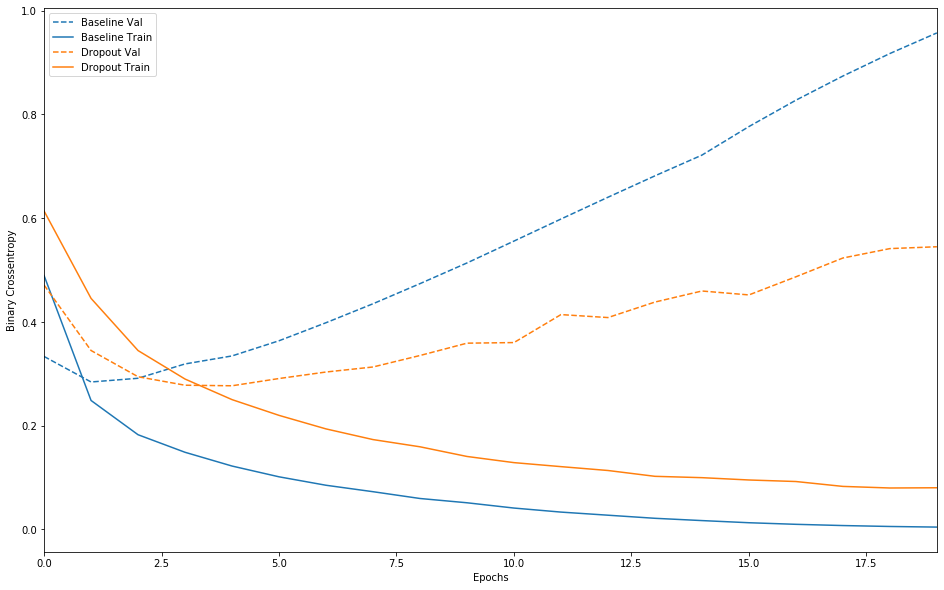

In [34]:
plot_history([('baseline', history_baseline),
              ('dropout', history_dropout)])